In [ ]:
Appliances-Energy-Prediction  --  ML Project

In [ ]:
Name : Sanusha Santhosh V

Organization : Entri Elevate

Date : 25th Sept 2024

DATA PREPROCESSING - DATA CLEANING

In [98]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("energydata_complete.csv")

# Display basic info about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

(None,
                   date  Appliances  lights     T1       RH_1    T2       RH_2  \
 0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
 1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
 2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
 3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
 4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
 
       T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
 0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
 1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
 2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
 3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
 4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   
 
    RH_out 

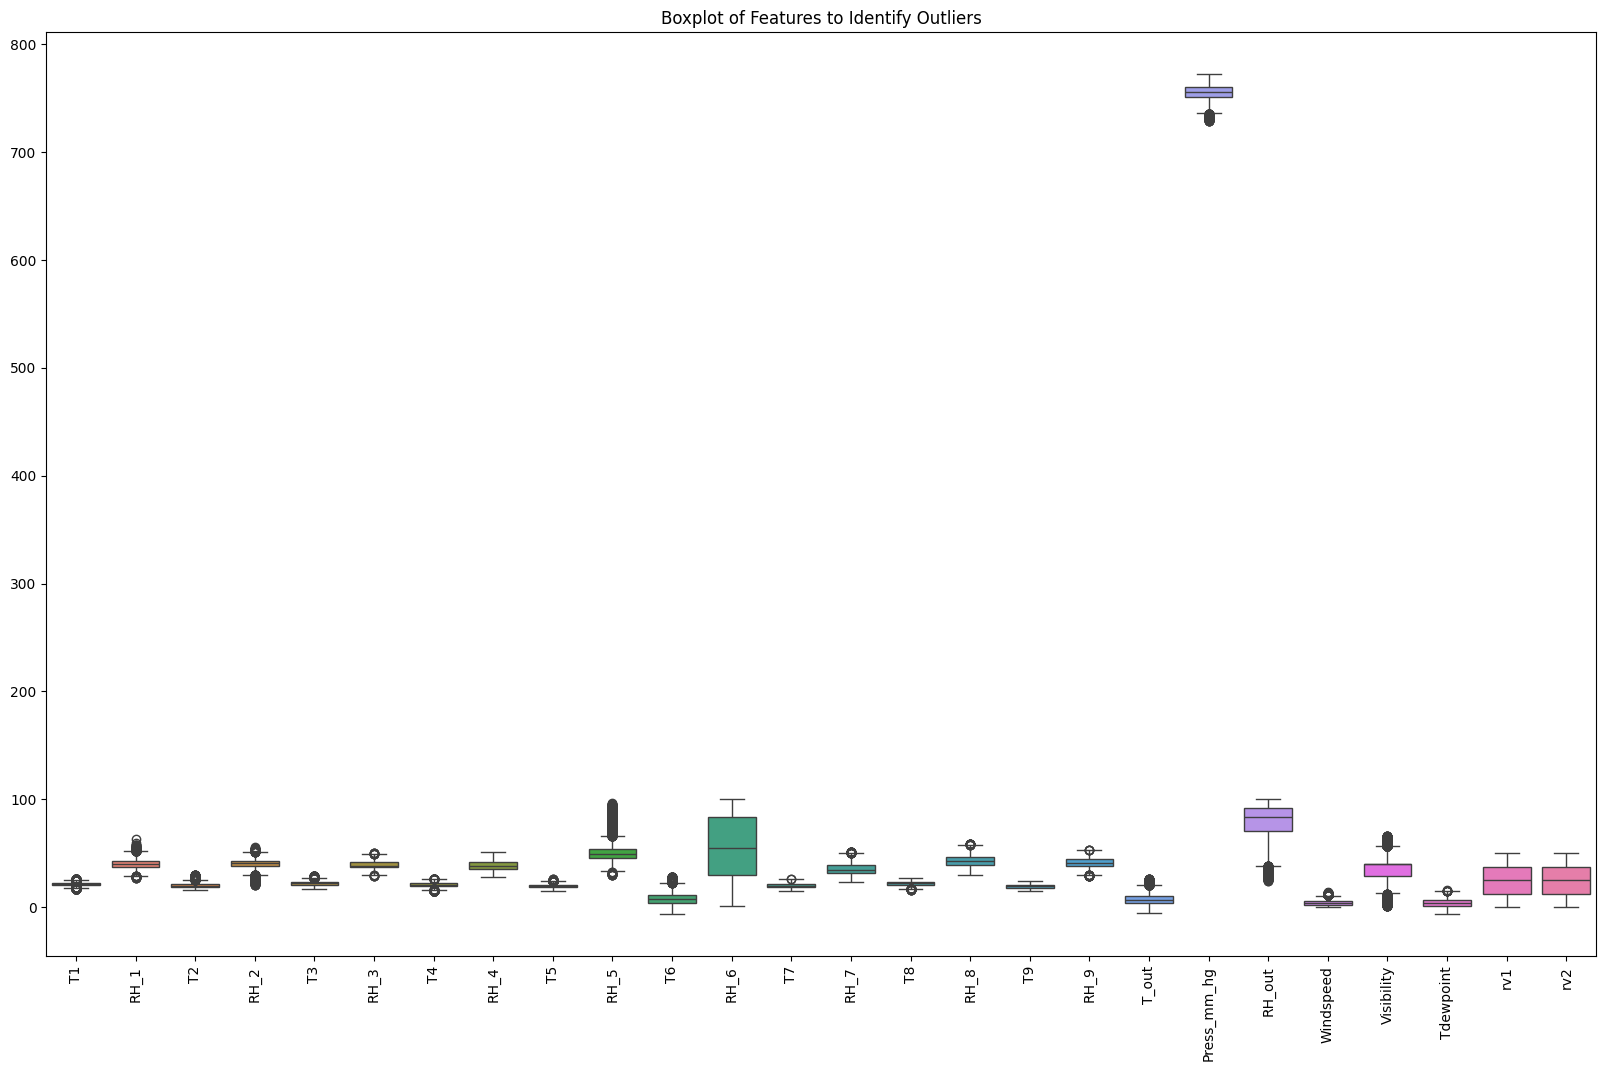

In [50]:
# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize data distribution using boxplots to detect outliers
plt.figure(figsize=(20, 12))
sns.boxplot(data=df.drop(columns=['date', 'Appliances', 'lights'])); # Drop date and some features for clarity
plt.title('Boxplot of Features to Identify Outliers')
plt.xticks(rotation=90)
plt.show()


In [51]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

# Apply the outlier removal method (excluding 'date' column)
df_cleaned = remove_outliers_iqr(df.drop(columns=['date']))

# Check how many rows were removed
len(df), len(df_cleaned)


(19735, 10485)

Skewed Features:
 Appliances     1.340443
Windspeed      0.692353
RH_3           0.579931
T5             0.543226
RH_5           0.521120
RH_4           0.497101
T2             0.480808
RH_1           0.453569
RH_8           0.377479
RH_9           0.323286
T9             0.323021
T3             0.278099
T6             0.248262
RH_7           0.233804
T7             0.212214
T4             0.203508
Tdewpoint      0.183777
T_out          0.124421
T1             0.120925
RH_2           0.015547
rv1            0.013997
rv2            0.013997
lights         0.000000
RH_6          -0.103718
Visibility    -0.149327
Press_mm_hg   -0.227688
T8            -0.311225
RH_out        -0.686139
dtype: float64


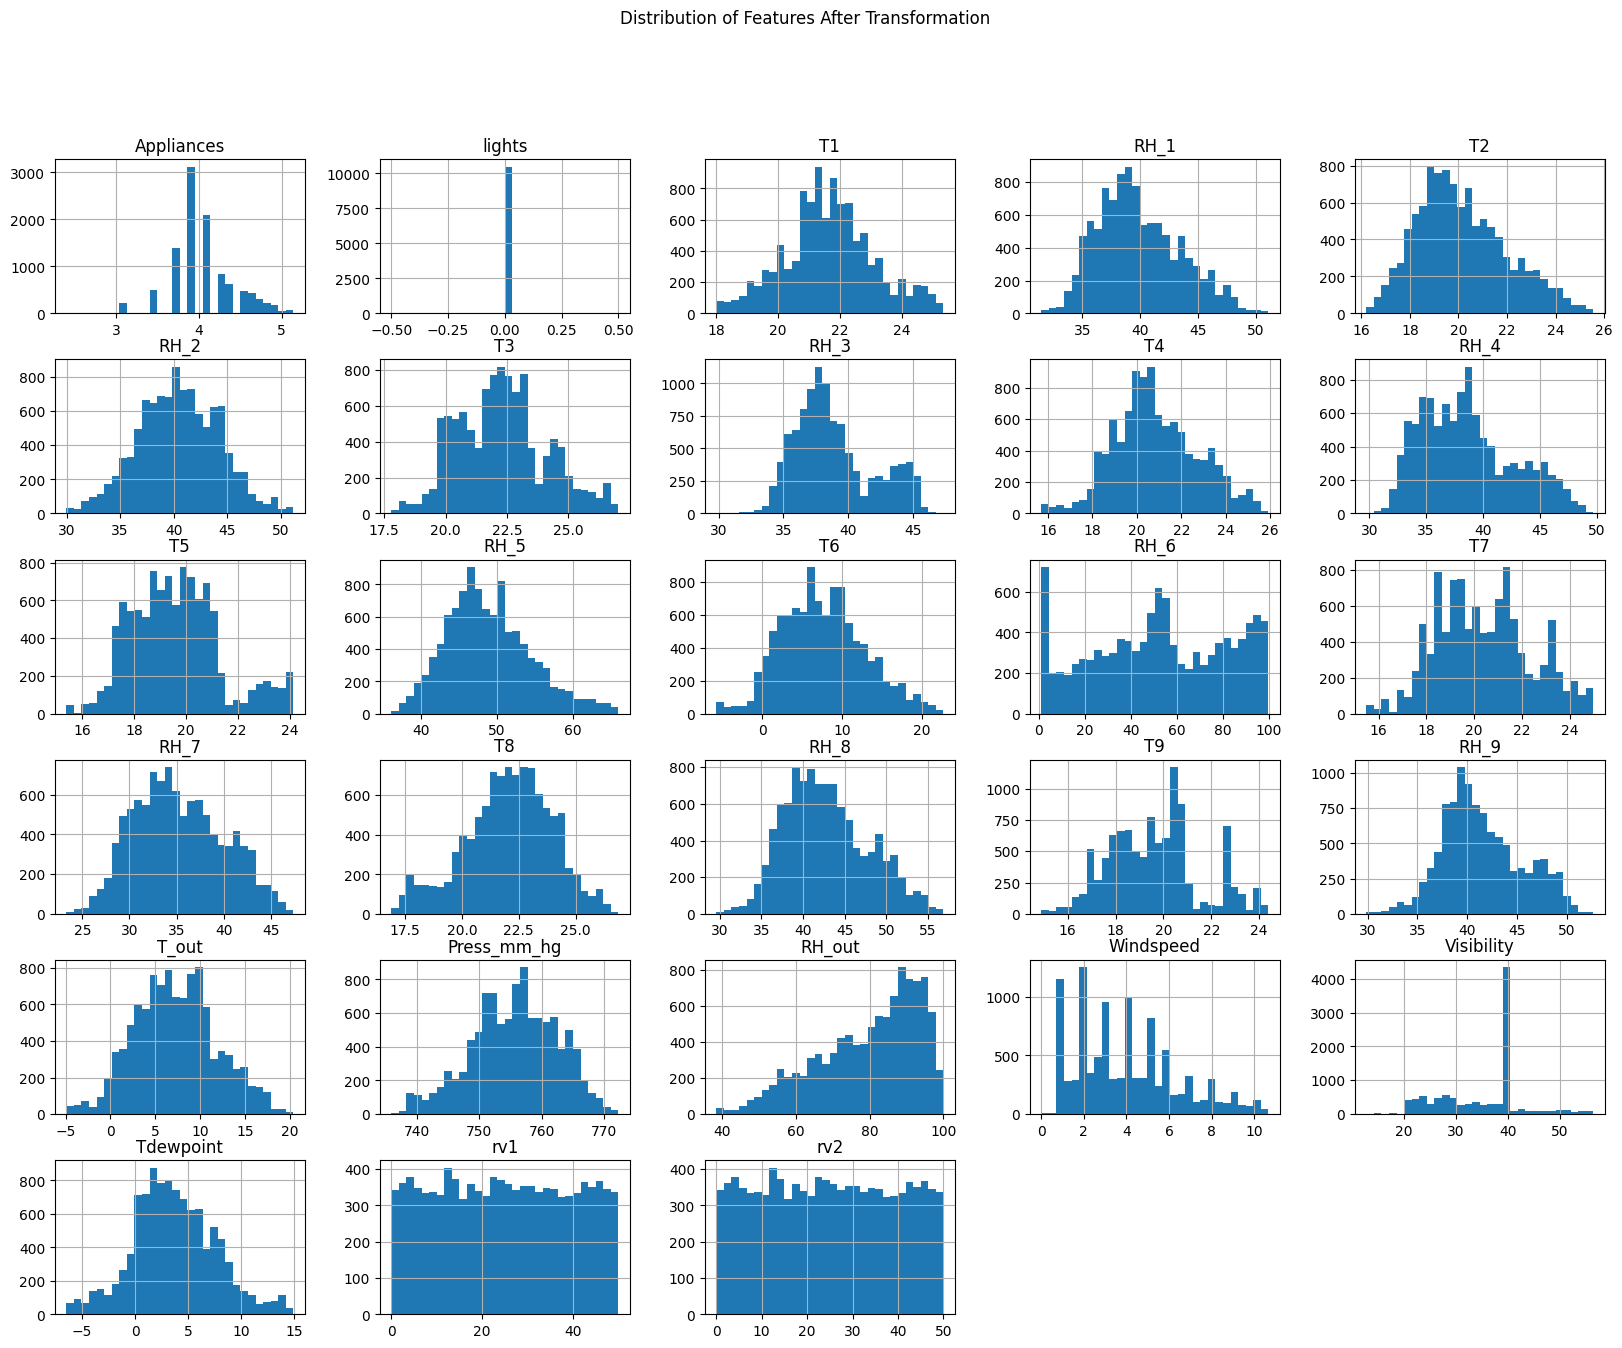

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check skewness of each numerical feature
def check_skewness(df):
    skewed_features = df.skew().sort_values(ascending=False)
    print("Skewed Features:\n", skewed_features)

# Apply log transformation to handle skewness for highly skewed features
def apply_transformations(df):
    skewed_features = df.skew().sort_values(ascending=False)
    # Apply log1p (log(1 + x)) to positive features with skewness > 0.75
    for feature in skewed_features.index:
        if skewed_features[feature] > 0.75 and (df[feature] > 0).all():
            df[feature] = np.log1p(df[feature])
    return df

# Check skewness
check_skewness(df_cleaned)

# Apply transformations to skewed features
df_transformed = apply_transformations(df_cleaned)

# Plot histograms after transformation
df_transformed.hist(figsize=(20, 15), bins=30)
plt.suptitle('Distribution of Features After Transformation')
plt.show()


FEATURE ENGINEERING

In [103]:
df.shape

(19735, 29)

In [105]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
EXPLORATORY DATA ANALYSIS (EDA):

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram to check the distribution of numerical features
def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot to detect outliers
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f"Boxplot of {column}")
    plt.show()

# Pair Plot to visualize relationships between multiple features
def plot_pairplot(df, columns):
    sns.pairplot(df[columns], diag_kind='kde')
    plt.show()

# KDE Plot for distribution
def plot_kde(df, column):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], color='red')
    plt.title(f"Kernel Density Estimate of {column}")
    plt.show()

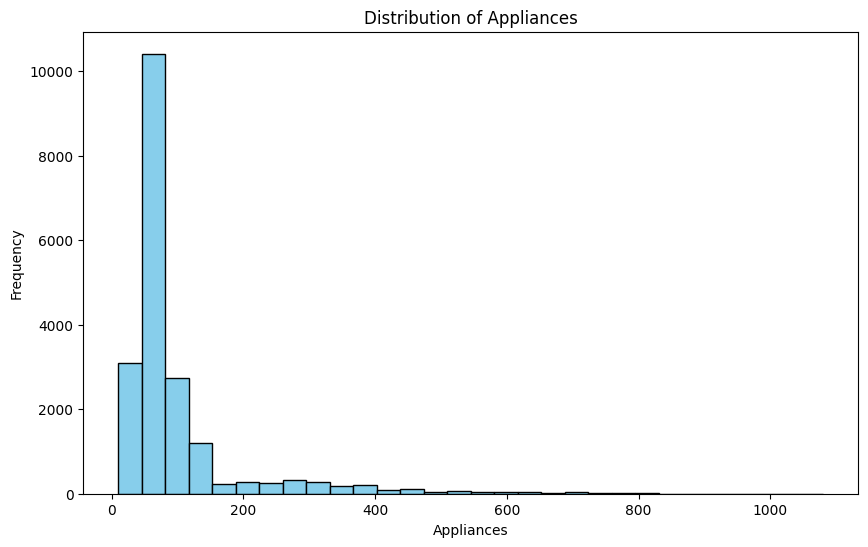

In [56]:
plot_histogram(df, 'Appliances')

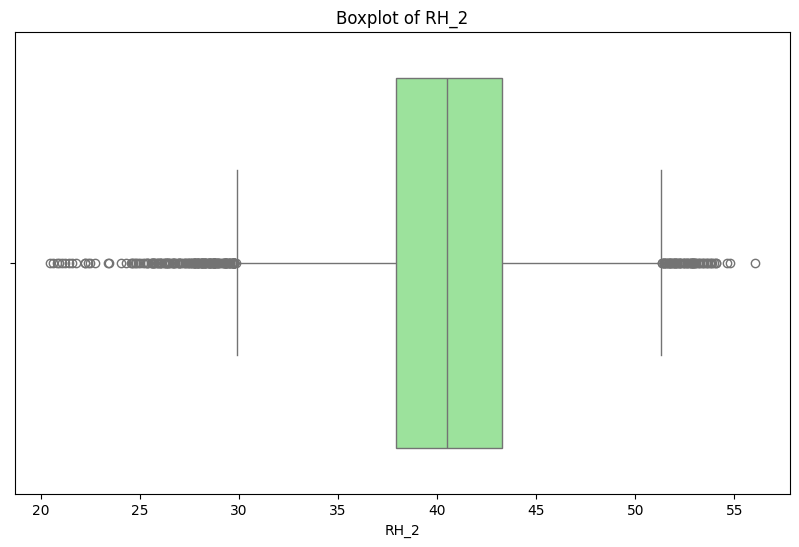

In [57]:
plot_boxplot(df, 'RH_2')

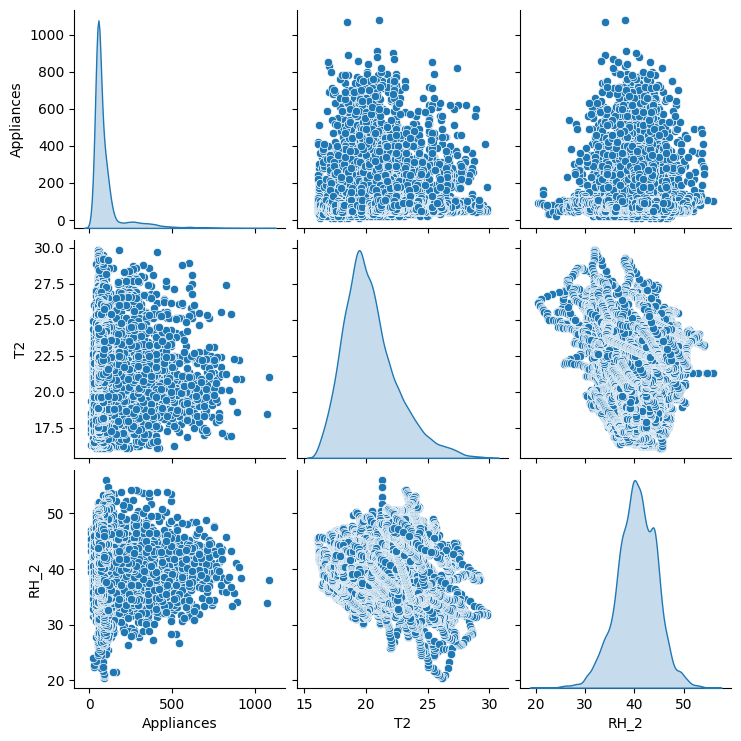

In [58]:
plot_pairplot(df, ['Appliances', 'T2', 'RH_2'])

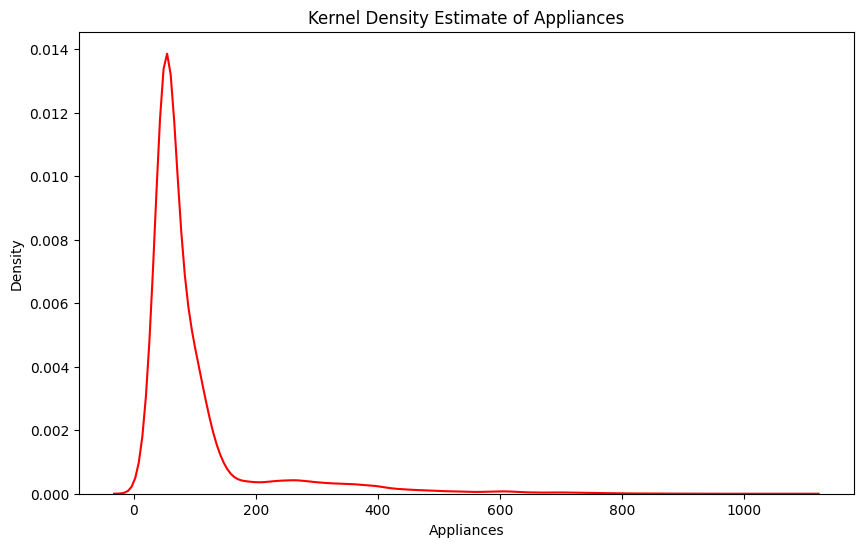

In [63]:
plot_kde(df, 'Appliances')

In [ ]:
FEATURE SELECTION

In [68]:
import pandas as pd
import numpy as np

# Calculate correlation matrix
correlation_matrix = df_transformed.corr()

# Display the correlation of features with the target variable 'Appliances'
corr_target = correlation_matrix['Appliances'].sort_values(ascending=False)
print(corr_target)

# Select features with high absolute correlation to 'Appliances'
# Here we choose features with correlation greater than 0.1 or less than -0.1 as an example
high_corr_features = corr_target[abs(corr_target) > 0.1].index.tolist()  # You can adjust this threshold
X_selected = df_transformed[high_corr_features].drop(columns=['Appliances'])

print("Selected Features based on correlation:\n", high_corr_features)


Appliances     1.000000
T8             0.346555
T2             0.291495
T1             0.289355
T6             0.281036
T_out          0.256767
T7             0.254437
T4             0.251680
T9             0.248285
T3             0.240295
T5             0.233055
Tdewpoint      0.088096
Visibility     0.047105
Windspeed      0.035832
rv1           -0.011398
rv2           -0.011398
RH_1          -0.070772
Press_mm_hg   -0.081309
RH_4          -0.146886
RH_5          -0.172411
RH_2          -0.173806
RH_7          -0.218162
RH_3          -0.223145
RH_9          -0.260771
RH_out        -0.289995
RH_8          -0.296290
RH_6          -0.346534
lights              NaN
Name: Appliances, dtype: float64
Selected Features based on correlation:
 ['Appliances', 'T8', 'T2', 'T1', 'T6', 'T_out', 'T7', 'T4', 'T9', 'T3', 'T5', 'RH_4', 'RH_5', 'RH_2', 'RH_7', 'RH_3', 'RH_9', 'RH_out', 'RH_8', 'RH_6']


In [69]:
# Manually splitting data into training and testing sets (80% training, 20% testing)
def manual_train_test_split(X, y, test_size=0.2):
    # Shuffle the data
    np.random.seed(42)  # For reproducibility
    shuffled_indices = np.random.permutation(len(X))
    
    # Split based on test size
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    # Create training and testing sets
    X_train = X.iloc[train_indices]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

# Manually split the dataset into training and testing sets
y = df_transformed['Appliances']  # Target variable
X_train, X_test, y_train, y_test = manual_train_test_split(X_selected, y, test_size=0.2)

# Output the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (8388, 19)
Test set shape: (2097, 19)


In [70]:
# Standardization: (X - mean) / std
def standardize_data(X_train, X_test):
    mean = X_train.mean()
    std = X_train.std()
    
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std  # Use training mean and std for test set scaling
    
    return X_train_scaled, X_test_scaled

# Apply standardization to the training and testing data
X_train_scaled, X_test_scaled = standardize_data(X_train, X_test)

print("Standardized Training Data (first 5 rows):\n", X_train_scaled.head())


Standardized Training Data (first 5 rows):
              T8        T2        T1        T6     T_out        T7        T4  \
16736  1.289395  1.717494  1.962153  1.175453  1.876614  1.434841  1.666594   
12303  0.296036 -0.681525  0.305867 -0.380541 -0.204129  0.507233 -0.042304   
8576  -0.615414 -1.875582 -0.897241 -1.467869 -1.813482 -0.480167 -0.574671   
11326  0.607985 -0.567026 -0.108205  0.284617  0.094172  0.250987 -0.042304   
7057   0.540019 -0.190816  0.091930 -0.296752 -0.355121  1.224720 -0.574671   

             T9        T3        T5      RH_4      RH_5      RH_2      RH_7  \
16736  1.040188  1.335532  0.975796 -0.474847  0.477502 -0.848914 -0.184011   
12303  0.663047  1.000883  0.632312  0.480806  0.506711  1.529446  0.068584   
8576  -0.783545 -1.007010 -1.061819 -1.138154  0.149046  0.320380  0.068584   
11326  0.379749  0.108486  0.283007  0.235137 -0.135298  0.983245  0.338868   
7057  -0.553365  0.588150 -1.405303 -1.646690 -0.392817 -2.032349 -2.513259   

      

In [71]:
# Min-Max Scaling: (X - min) / (max - min)
def min_max_scale_data(X_train, X_test):
    min_val = X_train.min()
    max_val = X_train.max()
    
    X_train_scaled = (X_train - min_val) / (max_val - min_val)
    X_test_scaled = (X_test - min_val) / (max_val - min_val)  # Use training min and max for test set scaling
    
    return X_train_scaled, X_test_scaled

# Apply Min-Max scaling to the training and testing data
X_train_minmax, X_test_minmax = min_max_scale_data(X_train, X_test)

print("Min-Max Scaled Training Data (first 5 rows):\n", X_train_minmax.head())


Min-Max Scaled Training Data (first 5 rows):
              T8        T2        T1        T6     T_out        T7        T4  \
16736  0.764333  0.757479  0.883552  0.684262  0.816864  0.811013  0.811788   
12303  0.574333  0.287393  0.557318  0.399850  0.444664  0.620975  0.498209   
8576   0.400000  0.053419  0.320344  0.201103  0.156785  0.418689  0.400521   
11326  0.634000  0.309829  0.475759  0.521430  0.498024  0.568479  0.498209   
7057   0.621000  0.383547  0.515179  0.415165  0.417655  0.767965  0.400521   

             T9        T3        T5      RH_4      RH_5      RH_2      RH_7  \
16736  0.706316  0.747365  0.675444  0.358081  0.519322  0.344883  0.460805   
12303  0.631579  0.682471  0.607899  0.557846  0.524771  0.767342  0.510162   
8576   0.344912  0.293105  0.274757  0.219426  0.458048  0.552580  0.510162   
11326  0.575439  0.509419  0.539210  0.506493  0.405004  0.670322  0.562975   
7057   0.390526  0.602435  0.207212  0.113124  0.356964  0.134674  0.005668   

    

LINEAR REGRESSION

In [72]:
import numpy as np

# Linear Regression using Normal Equation
def linear_regression(X_train, y_train):
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias (ones) to X
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
    return theta_best

# Prediction function for linear regression
def predict_linear(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias (ones) to X
    return X_b.dot(theta)

# Train linear regression model
theta = linear_regression(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = predict_linear(X_test_scaled, theta)

# Evaluation (Mean Squared Error)
mse_lr = np.mean((y_pred_lr - y_test) ** 2)
print("Linear Regression MSE:", mse_lr)


Linear Regression MSE: 0.10262393187439113


In [ ]:
RANDOM FOREST REGRESSOR

In [73]:
import random

# Simple Decision Tree Regressor
class SimpleDecisionTreeRegressor:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)
    
    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)
        
        # Randomly select a feature to split
        feature_idx = random.randint(0, X.shape[1] - 1)
        threshold = np.median(X[:, feature_idx])
        
        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold
        
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return np.mean(y)
        
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return (feature_idx, threshold, left_tree, right_tree)
    
    def predict_row(self, row):
        node = self.tree
        while isinstance(node, tuple):
            feature_idx, threshold, left_tree, right_tree = node
            if row[feature_idx] <= threshold:
                node = left_tree
            else:
                node = right_tree
        return node
    
    def predict(self, X):
        return np.array([self.predict_row(row) for row in X])

# Random Forest Regressor
class RandomForestRegressorManual:
    def __init__(self, n_estimators=10, max_depth=3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
    
    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sample
            indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]
            
            # Train individual decision trees
            tree = SimpleDecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.zeros((len(X), len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        return np.mean(predictions, axis=1)

# Train Random Forest Regressor
rf_model = RandomForestRegressorManual(n_estimators=10, max_depth=3)
rf_model.fit(X_train_scaled.values, y_train.values)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled.values)

# Evaluation (Mean Squared Error)
mse_rf = np.mean((y_pred_rf - y_test) ** 2)
print("Random Forest MSE:", mse_rf)


Random Forest MSE: 0.1206652268175195


SUPPORT VECTOR REGRESSOR

In [102]:
import numpy as np

class SimpleSVR:
    def __init__(self, C=1.0, epsilon=0.1, learning_rate=0.001, epochs=1000):
        self.C = C
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for epoch in range(self.epochs):
            for i in range(n_samples):
                condition = y[i] - (np.dot(X[i], self.w) + self.b)
                
                # Update weights if the point is outside the epsilon tube
                if np.abs(condition) > self.epsilon:
                    self.w -= self.learning_rate * (-self.C * (y[i] - np.dot(X[i], self.w) - self.b) * X[i])
                    self.b -= self.learning_rate * (-self.C * (y[i] - np.dot(X[i], self.w) - self.b))

    # Prediction function
    def predict(self, X):
        return np.dot(X, self.w) + self.b

# Example usage
# X_train: Feature matrix, y_train: Target values for training, X_test: Test data
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Example training data
y_train = np.array([2, 3, 4, 5])                      # Example target values
X_test = np.array([[1, 2], [2, 3], [3, 4]])            # Example test data

# Create the SVR model instance
svr = SimpleSVR(C=1.0, epsilon=0.1, learning_rate=0.001, epochs=1000)

# Train the model
svr.fit(X_train, y_train)

# Predict using the model
predictions = svr.predict(X_test)
print("Predictions:", predictions)


Predictions: [1.90015732 2.96673648 4.03331563]


GRADIENT BOOSTING REGRESSOR

In [ ]:
import numpy as np

# Decision Stump: Simple weak learner
class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        best_mse = float('inf')

        # Iterate over each feature and threshold to find the best split
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                # Create left and right masks
                left_mask = X[:, feature_index] < threshold
                right_mask = X[:, feature_index] >= threshold

                # Calculate left and right values (mean of targets)
                left_value = np.mean(y[left_mask]) if np.any(left_mask) else 0
                right_value = np.mean(y[right_mask]) if np.any(right_mask) else 0

                # Make predictions
                y_pred = np.zeros_like(y)
                y_pred[left_mask] = left_value
                y_pred[right_mask] = right_value

                # Calculate MSE
                mse = np.mean((y - y_pred) ** 2)

                # If the new split is better, update the best split
                if mse < best_mse:
                    best_mse = mse
                    self.feature_index = feature_index
                    self.threshold = threshold
                    self.left_value = left_value
                    self.right_value = right_value

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        left_mask = X[:, self.feature_index] < self.threshold
        right_mask = X[:, self.feature_index] >= self.threshold
        predictions[left_mask] = self.left_value
        predictions[right_mask] = self.right_value
        return predictions

# Gradient Boosting Regressor
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        # Initialize predictions to the mean of y
        y_pred = np.full(y.shape, np.mean(y))

        for _ in range(self.n_estimators):
            # Calculate residuals (errors)
            residuals = y - y_pred

            # Fit a decision stump to the residuals
            stump = DecisionStump()
            stump.fit(X, residuals)

            # Update predictions
            y_pred += self.learning_rate * stump.predict(X)
            self.trees.append(stump)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        # Sum predictions from all trees
        for stump in self.trees:
            y_pred += self.learning_rate * stump.predict(X)

        return y_pred

# Example usage with dummy data
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Features
y_train = np.array([2, 3, 4, 5])                      # Target

X_test = np.array([[1, 2], [2, 3], [3, 4]])            # Test data

# Create the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Train the model
gbr.fit(X_train, y_train)

# Predict on test data
predictions = gbr.predict(X_test)
print("Predictions:", predictions)


MLP REGRESSOR

In [ ]:
import numpy as np

class SimpleMLPRegressor:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        return self.Z2
    
    def backward(self, X, y, output):
        # Error at output layer
        output_error = y - output
        output_delta = output_error
        
        # Error at hidden layer
        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.A1)
        
        # Update weights and biases
        self.W2 += self.A1.T.dot(output_delta) * self.learning_rate
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.W1 += X.T.dot(hidden_delta) * self.learning_rate
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y):
        for epoch in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 100 == 0:
                loss = np.mean((y - output) ** 2)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
    
    def predict(self, X):
        return self.forward(X)

# Example usage with dummy data
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Example training data
y_train = np.array([[2], [3], [4], [5]])              # Example target values
X_test = np.array([[1, 2], [2, 3], [3, 4]])            # Example test data

# Create MLP instance
mlp = SimpleMLPRegressor(input_size=X_train.shape[1], hidden_size=10, output_size=1, learning_rate=0.01, epochs=1000)

# Train the MLP model
mlp.train(X_train, y_train)

# Predict on test data
predictions = mlp.predict(X_test)
print("MLP Predictions:", predictions)


MODEL EVALUATION

In [110]:
import numpy as np

# Evaluation Metrics
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    unexplained_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (unexplained_variance / total_variance)

# Example usage with dummy data
y_true = np.array([3, -0.5, 2, 7])  # Actual values
y_pred = np.array([2.5, 0.0, 2, 8])  # Predicted values

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Display the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 0.5
MSE: 0.375
RMSE: 0.6123724356957945
R² Score: 0.9486081370449679


HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

svr = SVR()
svr_grid_search = GridSearchCV(svr, svr_param_grid, cv=5, n_jobs=-1, verbose=1)
svr_grid_search.fit(X_train_scaled, y_train)
print("Best parameters for SVR:", svr_grid_search.best_params_)
Random Search for Random Forest Regressor:


rf = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_random_search.best_params_)
Grid Search for Gradient Boosting Regressor:


gbr = GradientBoostingRegressor(random_state=42)
gbr_grid_search = GridSearchCV(gbr, gbr_param_grid, cv=5, n_jobs=-1, verbose=1)
gbr_grid_search.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", gbr_grid_search.best_params_)
Evaluate Tuned Models:


# Get the best models from the search
best_svr = svr_grid_search.best_estimator_
best_rf = rf_random_search.best_estimator_
best_gbr = gbr_grid_search.best_estimator_

# Predict using the tuned models
svr_tuned_pred = best_svr.predict(X_test_scaled)
rf_tuned_pred = best_rf.predict(X_test)
gbr_tuned_pred = best_gbr.predict(X_test)

# Evaluate performance of the tuned models
print("Tuned SVR Performance:")
evaluate_model(y_test, svr_tuned_pred)

print("\nTuned Random Forest Regressor Performance:")
evaluate_model(y_test, rf_tuned_pred)

print("\nTuned Gradient Boosting Regressor Performance:")
evaluate_model(y_test, gbr_tuned_pred)

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset
data = pd.read_csv("energydata_complete.csv")

# Define features and target
X = data.drop(columns=['Appliances', 'date'])  # Drop target and non-numeric columns
y = data['Appliances']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids
svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Grid search for SVR
svr = SVR()
svr_grid_search = GridSearchCV(svr, svr_param_grid, cv=5, n_jobs=-1, verbose=1)
svr_grid_search.fit(X_train_scaled, y_train)

# Randomized search for Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42)
rf_random_search.fit(X_train, y_train)

# Grid search for Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid_search = GridSearchCV(gbr, gbr_param_grid, cv=5, n_jobs=-1, verbose=1)
gbr_grid_search.fit(X_train, y_train)

# Get best estimators
best_svr = svr_grid_search.best_estimator_
best_rf = rf_random_search.best_estimator_
best_gbr = gbr_grid_search.best_estimator_

# Predict with tuned models
svr_tuned_pred = best_svr.predict(X_test_scaled)
rf_tuned_pred = best_rf.predict(X_test)
gbr_tuned_pred = best_gbr.predict(X_test)

# Function to evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2 Score: {r2}')

# Evaluate tuned models
print("Tuned SVR Performance:")
evaluate_model(y_test, svr_tuned_pred)

print("\nTuned Random Forest Regressor Performance:")
evaluate_model(y_test, rf_tuned_pred)

print("\nTuned Gradient Boosting Regressor Performance:")
evaluate_model(y_test, gbr_tuned_pred)


SAVE THE MODEL 

In [ ]:
import joblib
# Save the best model (e.g., Random Forest Regressor)
joblib.dump(best_rf, 'random_forest_model.pkl')

# Save other models
joblib.dump(best_lr, 'lr_model.pkl')
joblib.dump(best_mlp, 'mlp_model.pkl')
joblib.dump(best_svr, 'svr_model.pkl')
joblib.dump(best_gbr, 'gradient_boosting_model.pkl')

# Load the Random Forest model
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Load other models
loaded_svr_model = joblib.load('lr_model.pkl')
loaded_svr_model = joblib.load('mlp_model.pkl')
loaded_svr_model = joblib.load('svr_model.pkl')
loaded_gbr_model = joblib.load('gradient_boosting_model.pkl')

# Use the loaded model to make predictions
predictions = loaded_rf_model.predict(X_test)
predictions = loaded_lr_model.predict(X_test)
predictions = loaded_mlp_model.predict(X_test)
predictions = loaded_svr_model.predict(X_test)
predictions = loaded_gbr_model.predict(X_test)

FUTURE WORK

1. Explore Deep Learning Algorithms for Potentially Higher Accuracy:
While traditional machine learning models like Random Forest and Gradient Boosting have shown good performance, exploring deep learning models could potentially yield even better results, especially for complex datasets like energy consumption data.
2. Update the Model Periodically with New Data:
The energy consumption patterns are likely to change over time due to seasonal variations, changes in user behavior, or technological advancements. Therefore, it’s essential to update the model periodically to ensure it remains accurate and up-to-date.
3. Consider Adding More Features to Enhance Predictive Power:
The current dataset may benefit from the addition of more relevant features that impact energy consumption. This can improve model accuracy and provide a better understanding of energy usage patterns.
